Galton's Peas

Research Task: Test if there is a statistically significant inheritance effect between parent pea 
diameters and offspring pea diameters. 

Data Features: The data is linear, has no outliers or influential 
observations, and it has a constant variance (no megaphone shapes). Therefore, it is well suited for a
Simple Linear Regression Model. 

In [2]:
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
#Data
#from 1877 experiment by Galton
d = "Parent,Offspring\n0.21, 0.1726\n0.20, 0.1707\n0.19, 0.1637\n0.18, 0.1640\n0.17, 0.1613\n0.16, 0.1617\n0.15, 0.1598"
peas = pd.read_csv(StringIO(d))
peas

,Parent,Offspring
0,0.21,0.1726
1,0.20,0.1707
2,0.19,0.1637
3,0.18,0.1640
4,0.17,0.1613
5,0.16,0.1617
6,0.15,0.1598


EDA

In [4]:
#Find the Correlation Coefficient between Parent and Offspring
peas['Parent'].corr(peas['Offspring'])

0.9248759136365537

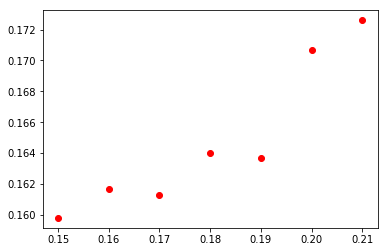

In [5]:
#Create a Scatterplot of the Data
plt.plot(peas["Parent"], peas["Offspring"], "ro")

Text(0,0.5,'Diameter of Offspring Pea')

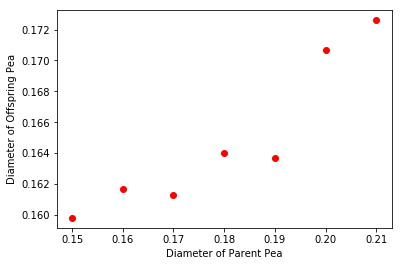

In [23]:
plt.xlabel("Diameter of Parent Pea")
plt.ylabel("Diameter of Offspring Pea")

Analysis

In [24]:
#Model: Offspring = beta0 + beta1*Parent + Epsiolon, Epsilon~N(0,sigma2)
results = smf.ols('Offspring~Parent', data=peas).fit()
results.summary()



/usr/local/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Offspring   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     29.58
Date:                Thu, 26 Jul 2018   Prob (F-statistic):            0.00285
Time:                        11:48:52   Log-Likelihood:                 34.598
No. Observations:                   7   AIC:                            -65.20
Df Residuals:                       5   BIC:                            -65.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1270      0.007     18.164      0.000       0.109       0.145
Parent         0.2100      0.039      5.438      0.003       0.111       0.309
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.747
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.852
Skew:                          -0.721   Prob(JB):                        0.653
Kurtosis:                       2.084   Cond. No.                         51.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Is there a statistically significant inheritance effect?

T-test

H0: beta1 = 0   (AKA there is no change in offspring given different parent diameters)
T-test statistic value = 5.438
p-value = 0.00285

Formal Conclusion: There is a statistically significant inheritance effect of parent pea diameters on 
offspring pea diameters. There is an estimated effect with a slope of 0.21.

To a Non-statistician: There is a statistically significant effect of parent pea diameters on offspring
pea diameters. For every 1 unit increase in parent sweet pea diameter, we expect an estimated 
increase of 0.21 inch in the offspring sweet pea diameter.

ANOVA

H0: beta1 = 0
ANOVA F-test statistic value: 29.58 on 1 and 5 DF
p-value: 0.002852

Formal Conclusion:  Because the pvalue is less that .05, there is a statistically significant   
inheritance effect of parent pea diameters on offspring pea diameters. There is an estimated effect 
with a slope of 0.21.
    
To a Non-statistician: There is a statistically significant effect of parent pea diameters on offspring
pea diameters. For every 1 unit increase in parent sweet pea diameter, we expect an estimated 
increase of 0.21 inch in the offspring sweet pea diameter.


95% Confidence Interval on the beta1
CI = (0.111, 0.309)

Formal Conclusion: Because 0 is not in our 95% confidence interval for beta1, we believe that there is
a significant inheritance effect between parent pea diameters and offspring pea diameters. The 
estimated effect is beta1=0.21

To a Non-Statistician: We are 95% confident that 0 is not a possible value for the slope, which means
that there is a statistically significant effect between parent pea diameters and offspring pea 
diameters.

In [7]:
#A simple function that allow you to plot a line based off of slope and intercept
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

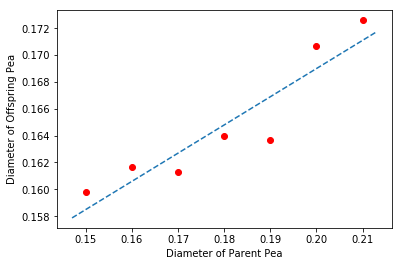

In [8]:
#Create a graphic that show data with the line of best fit
plt.plot(peas["Parent"], peas["Offspring"], "ro")
plt.xlabel("Diameter of Parent Pea")
plt.ylabel("Diameter of Offspring Pea")
abline(0.21, 0.127)

In [54]:
#If asked to predict a value of a future offspring diameter from parents with diameter=0.18
results.predict(exog=dict(Parent = 0.18))


0    0.164829
dtype: float64